In [1]:
import pandas as pd

df = pd.read_csv('..\data\inputs\peptides_descriptors.csv', delimiter=',')
target = df['antibios']


In [2]:
corr = df.corr()
corr['antibios'].sort_values(ascending=False)

antibios            1.000000
FractionCSP3        0.575341
fr_unbrch_alkane    0.561002
VSA_EState8         0.541196
SlogP_VSA4          0.507489
                      ...   
fr_tetrazole             NaN
fr_thiazole              NaN
fr_thiocyan              NaN
fr_thiophene             NaN
fr_urea                  NaN
Name: antibios, Length: 211, dtype: float64

In [3]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Ipc', "antibios"])
X=X[[c for c, u in zip(X.columns.to_list(),(X.nunique())) if u>1]]
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
# Replace nan by 0
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [5]:
pd.concat([X, target], axis=1).corr()['antibios'].sort_values(ascending=False)

antibios                   1.000000
FractionCSP3               0.575341
fr_unbrch_alkane           0.561002
VSA_EState8                0.541196
SlogP_VSA4                 0.507489
                             ...   
fr_para_hydroxylation     -0.586586
fr_bicyclic               -0.586586
NumAromaticHeterocycles   -0.602883
fr_Ar_NH                  -0.602883
fr_Nhpyrrole              -0.602883
Name: antibios, Length: 141, dtype: float64

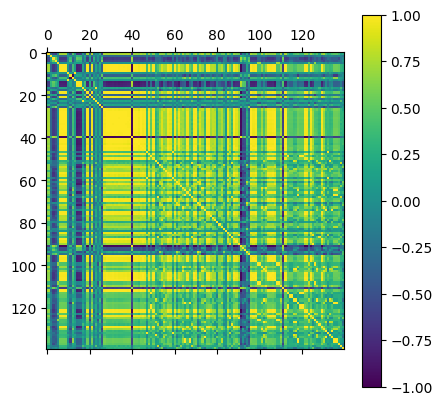

In [6]:
import matplotlib.pyplot as plt

corr = X_train.corr()
plt.matshow(corr)
plt.colorbar()
plt.show()

In [7]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.95

In [8]:
pd.DataFrame({"test" :y_test.to_numpy(), "pred": y_pred})

,test,pred
0,True,True
1,True,True
2,True,True
3,False,False
4,False,False
5,False,False
6,True,True
7,False,False
8,False,False
9,True,True


In [9]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

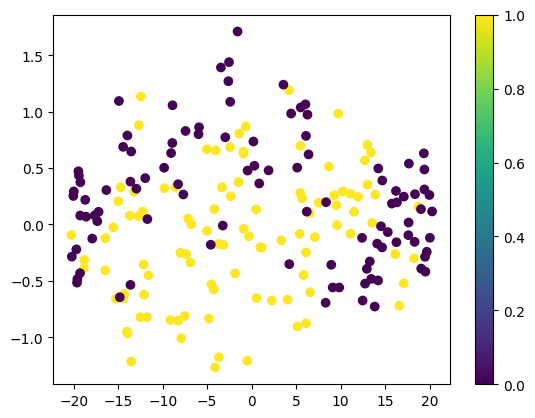

In [10]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=target)
plt.colorbar() 
plt.show()